[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lectures-python/Python_lectures_HW/blob/main/HW/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import requests
import pandas as pd

In [2]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)

### Загрузим уже готовый dataframe

In [3]:
df = pd.read_csv("df_csv.csv")
df.head()

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,13-10-2022 01:28,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,0,[],False,0,Не нормируется,7.0,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10-10-2022 14:47,57.1519,65.5536,1,0,Элитный,13-10-2022 01:28,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6450...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",645065,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-00009

### csv файл был принудительно сохранен без столбца id, чтобы при импорте он не дублировался, если он будет, то удалим.

In [4]:
df = df.drop(columns='Unnamed: 0') if 'Unnamed: 0' in df.columns else df
df.head()

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,13-10-2022 01:28,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,0,[],False,0,Не нормируется,7.0,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10-10-2022 14:47,57.1519,65.5536,1,0,Элитный,13-10-2022 01:28,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6450...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",645065,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-00009

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 109 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    id                                         10594 non-null  int64  
 1    pdId                                       10594 non-null  int64  
 2    region                                     10594 non-null  int64  
 3    address                                    10568 non-null  object 
 4    objElemLivingCnt                           10594 non-null  int64  
 5    objReady100PercDt                          10594 non-null  object 
 6    wallMaterialShortDesc                      10594 non-null  object 
 7    objLkFinishTypeDesc                        10594 non-null  object 
 8    objLkFreePlanDesc                          10585 non-null  object 
 9    objElemParkingCnt                          10594 non-null  int64  
 10   objSquar

### Видим, что максимальное количество записей 10660, но в некоторых столбах их меньше. Это говорит о том, что есть пропуски. В данной тематике пропуски играют не самую последнею роль, поэтому не будем от них избавляться. В дальнейшем данная информация может пригодиться.

In [6]:
url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/сервисы/api/dictionary/regions'
region = requests.get(url).json()

## Расчет средней цены за квадратный метр по регионам.

In [7]:
avgPrice = {}
for reg in region:
    row = dict({'name' : reg['name'],'avg': 0, 'sum' : 0, 'count' : 0})
    avgPrice[reg['id']] = row

for obj in df.iterrows():
    if not pd.isna(obj[1]['objPriceAvg']):
        row = avgPrice[obj[1]['region']]
        row['sum'] += obj[1]['objPriceAvg']
        row['count'] += 1
        row['avg'] = row['sum']/row['count']
df_price = pd.DataFrame(avgPrice).T
df_price 

,name,avg,sum,count
1,Республика Адыгея,65108.485714,2278797.0,35
2,Республика Башкортостан,79282.670213,14905142.0,188
3,Республика Бурятия,66914.948718,2609683.0,39
4,Республика Алтай,79771.0,319084.0,4
5,Республика Дагестан,24695.909091,271655.0,11
...,...,...,...,...
86,Ханты-Мансийский АО - Югра,90923.081081,3364154.0,37
87,Чукотский АО,0,0,0
89,Ямало-Ненецкий АО,94560.714286,1985775.0,21
91,Республика Крым,109330.675325,16836924.0,154


In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

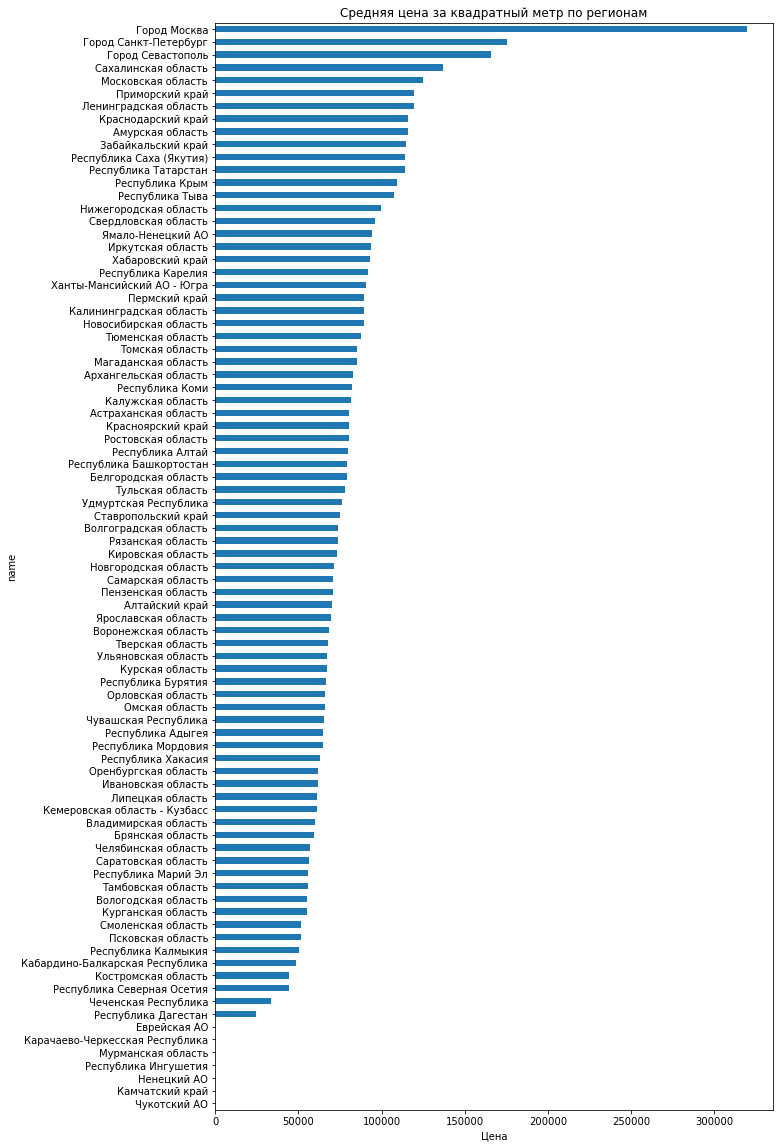

In [9]:
price_series = df_price.set_index('name')['avg']
from pylab import rcParams
rcParams['figure.figsize'] = 10,20
plt.title('Средняя цена за квадратный метр по регионам')
plt.xlabel('Цена')
plt.ylabel('Регионы', rotation=90)
price_series.sort_values(ascending=True).plot(kind='barh')
plt.show()

### Из гистограммы видно, что самая высокая средняя цена за квадратный метр в Сахалинской области, самая низкая в Республике Дагестан. Также видим что в некоторых регионах отсутствует результат, это связано с  тем что в данный момент там либо нет активных строек, либо еще не определена цена, это также проверено с помощью сайта. 

## Объемы строящихся домов по регионам.

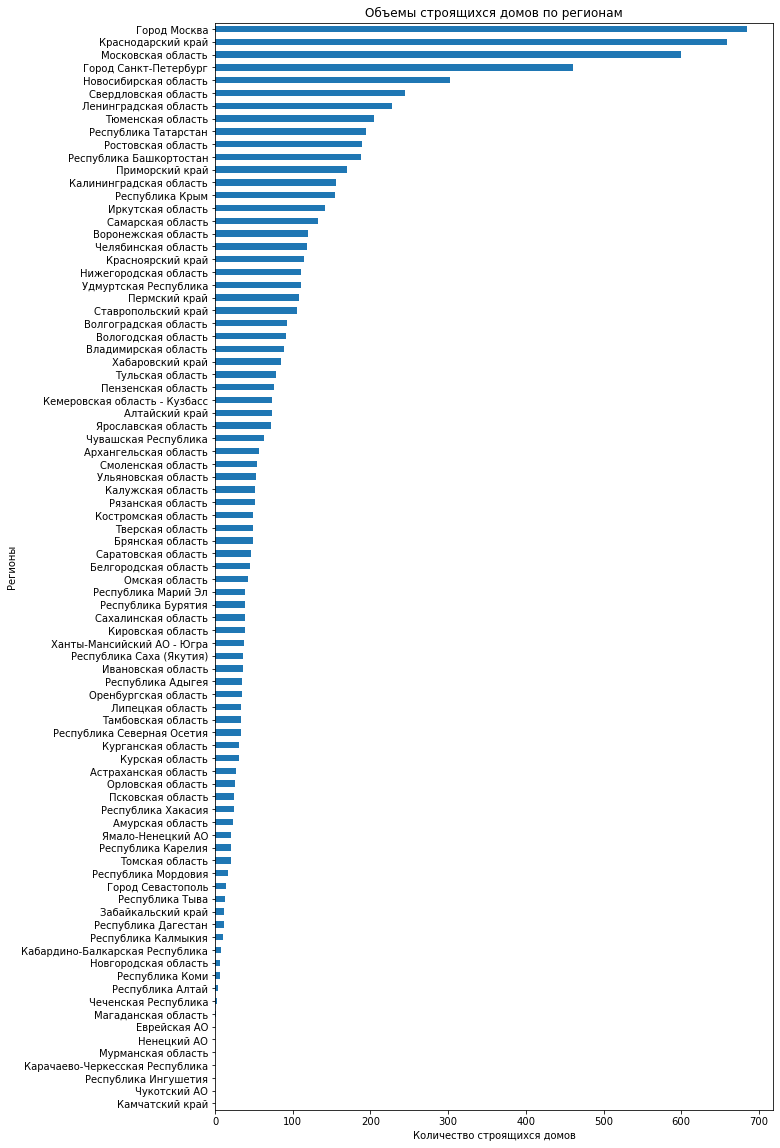

In [10]:
volume_series = df_price.set_index('name')['count']
rcParams['figure.figsize'] = 10,20
volume_series.sort_values(ascending=True).plot(kind='barh')
plt.title('Объемы строящихся домов по регионам')
plt.xlabel('Количество строящихся домов')
plt.ylabel('Регионы', rotation=90)
plt.show()

### Больше всего домов строится в Москве и Краснодарском крае, меньше всего в Республике Алтай и Чеченской Республике. Если провести корреляцию первого и второго графика, то можно заметить, что чем больше строиться домов, тем больше стоимость квадратного метра и наоборот. Из этого можно сделать вывод о том, какие регионы имеет наибольшую актуальность и спрос(желание) там жить.

## Количество введенных в эксплуатацию домов по годам.

In [11]:
statisticsYear = {}
for obj in df.iterrows():
    row = int(obj[1]['objReady100PercDt'][:4])
    count = statisticsYear[row] if row in statisticsYear.keys() else 1
    statisticsYear[row] = count+1

df_years = pd.DataFrame(list(statisticsYear.items()), columns=['year', 'count'])
df_years = df_years.sort_values('year')
df_years

,year,count
12,2017,7
20,2018,2
13,2019,2
0,2020,26
6,2021,35
...,...,...
14,2033,2
16,2034,2
18,2036,3
19,2038,2


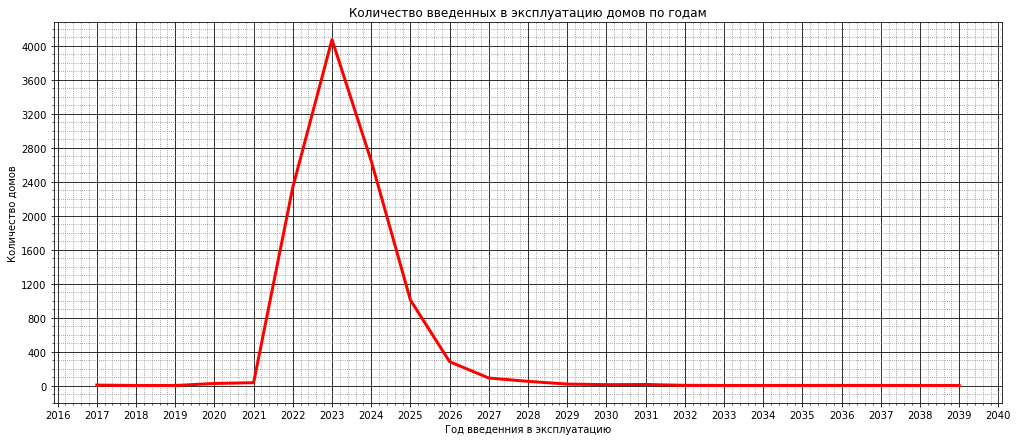

In [12]:
rcParams['figure.figsize']= 14.5,5
fig, ax = plt.subplots()
ax.plot(df_years['year'], df_years['count'], color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(400))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(200))
plt.title('Количество введенных в эксплуатацию домов по годам')
plt.xlabel('Год введенния в эксплуатацию')
plt.ylabel('Количество домов', rotation=90)
ax.grid(which='major', color = 'k')
ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

### Из графика видно, что ближайшие два года будет достаточно большое количество новостроек, которые введут в эксплуатацию. Также видно, что пик сдач будет в 2023 году.

## Этажность домов

In [13]:
statisticsFloor = {}
for obj in df.iterrows():
    if not pd.isna(obj[1]['floorMax']):
        row = int(obj[1]['floorMax'])
        count = statisticsFloor[row] if row in statisticsFloor.keys() else 1
        statisticsFloor[row] = count+1

df_floor = pd.DataFrame(list(statisticsFloor.items()), columns=['floor', 'count'])
#разбили df на два, чтобы послднии значения было лучше видно
df_floor1 = df_floor.sort_values('count')[int(len(df_floor)/2):]
df_floor2 = df_floor.sort_values('count')[0:int(len(df_floor)/2)]
df_floor

,floor,count
0,20,234
1,12,221
2,1,333
3,10,795
4,6,495
...,...,...
57,50,2
58,49,2
59,56,3
60,51,3


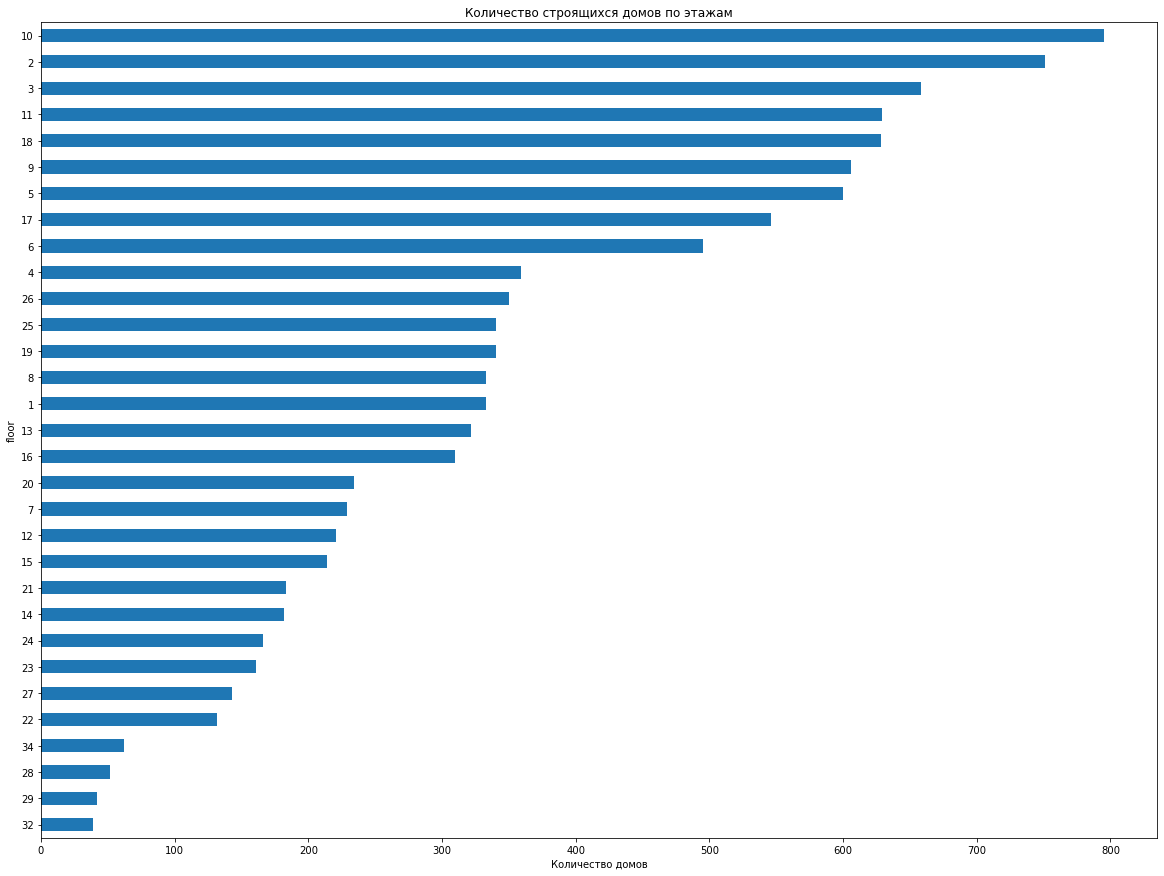

In [14]:
floor_series1 = df_floor1.set_index('floor')['count']
floor_series2 = df_floor2.set_index('floor')['count']

rcParams['figure.figsize'] = 20,15
plt.title('Количество строящихся домов по этажам')
plt.xlabel('Количество домов')
plt.ylabel('Количество этажей', rotation=90)
floor_series1.sort_values(ascending=True).plot(kind='barh')
plt.show()
#Первая часть

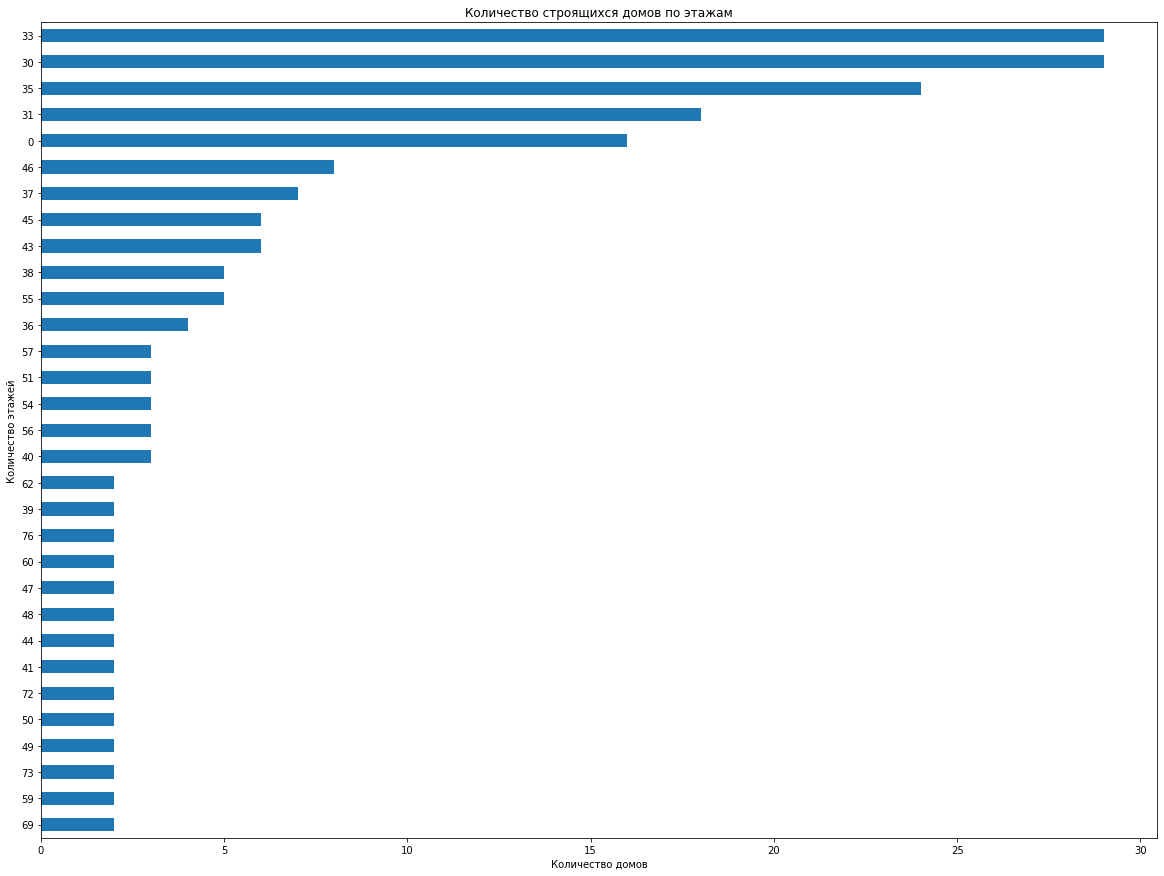

In [15]:
floor_series2.sort_values(ascending=True).plot(kind='barh')
plt.title('Количество строящихся домов по этажам')
plt.xlabel('Количество домов')
plt.ylabel('Количество этажей', rotation=90)
plt.show()
#Вторая часть

### По гистограмме видно, что большего всего строиться домов с 10 этажами. А домов с количеством этажей больше 36 наоборот строится очень мало. Самое высокое здание составляет 69 этажей, также таких домов строится меньше всего.

In [16]:
avgFloor = {}
for reg in region:
    row = dict({'name' : reg['name'], 'avg': 0, 'sum' : 0, 'count' : 0})
    avgFloor[reg['id']] = row

for obj in df.iterrows():
    if not pd.isna(obj[1]['floorMax']):
        row = avgFloor[obj[1]['region']]
        row['sum'] += obj[1]['floorMax']
        row['count'] += 1
        row['avg'] = row['sum']/row['count']
df_floorAvg = pd.DataFrame(avgFloor).T
df_floorAvg = df_floorAvg.sort_values('avg')
df_floorAvg

,name,avg,sum,count
51,Мурманская область,0,0,0
87,Чукотский АО,0,0,0
83,Ненецкий АО,0,0,0
6,Республика Ингушетия,0,0,0
41,Камчатский край,0,0,0
...,...,...,...,...
58,Пензенская область,16.107143,1353.0,84
66,Свердловская область,17.907738,6017.0,336
62,Рязанская область,18.289855,1262.0,69
77,Город Москва,18.917492,17196.0,909


#### 8 регионов у которых наибольшая средняя этажность строящихся домов.

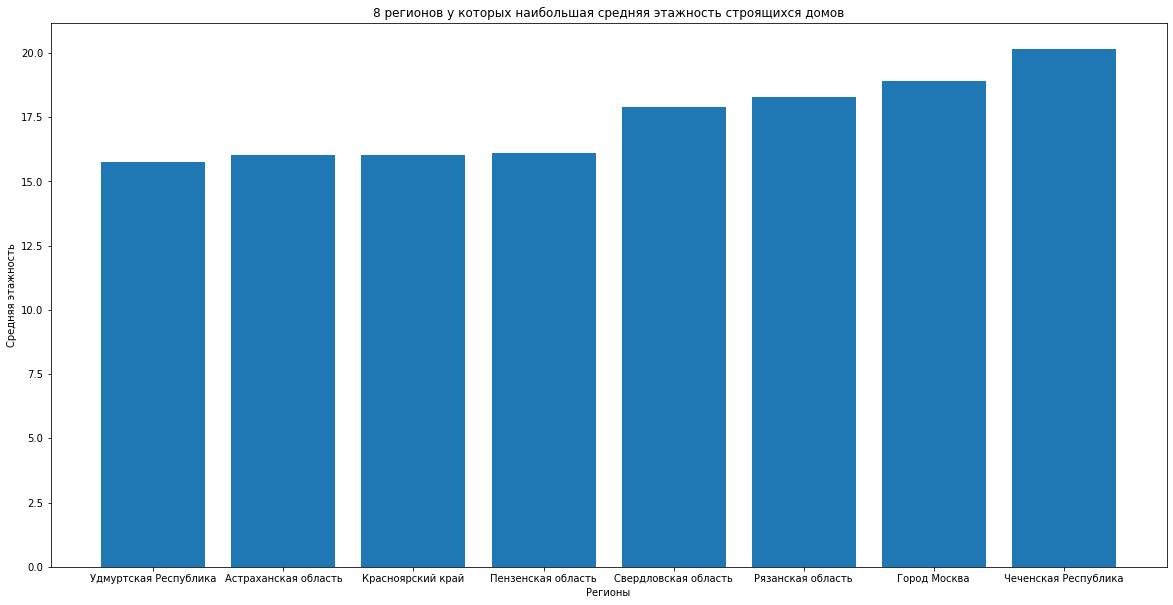

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('8 регионов у которых наибольшая средняя этажность строящихся домов')
plt.xlabel('Регионы')
plt.ylabel('Средняя этажность', rotation=90)
chart1 = ax.bar(df_floorAvg['name'][-8:], df_floorAvg['avg'][-8:])

#### 8 регионов у которых наименьшая средняя этажность строящихся домов.

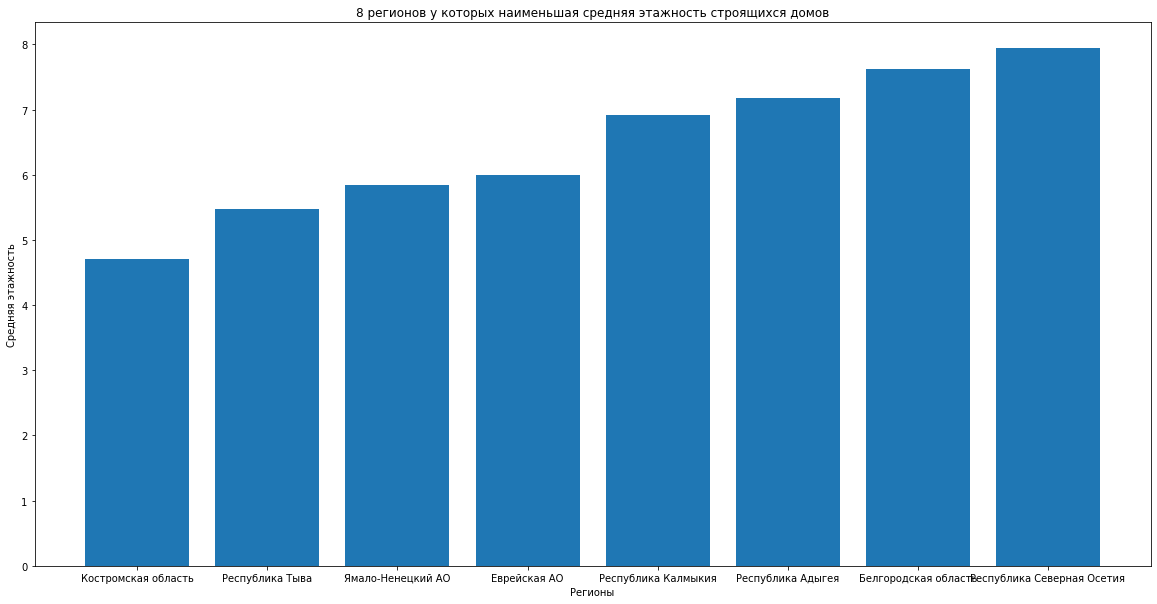

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('8 регионов у которых наименьшая средняя этажность строящихся домов')
plt.xlabel('Регионы')
plt.ylabel('Средняя этажность', rotation=90)
chart2 = ax.bar(df_floorAvg['name'][5:13], df_floorAvg['avg'][5:13])

### По гистограммам видно, что в Чеченской Республике и Москве на данный момент средняя этажность строящихся домов составляет 20 и 19 этажей. Это может говорит, что в данных городах востребованы многоэтажки.

## Количество квартир

In [19]:
statisticsFlat = {}
for obj in df.iterrows():
    #Намерено не будем сохранять дома с количеством квартир равным нулю
    if not pd.isna(obj[1]['objElemLivingCnt']) and obj[1]['objElemLivingCnt'] != 0:
        row = int(obj[1]['objElemLivingCnt'])
        count = statisticsFlat[row] if row in statisticsFlat.keys() else 1
        statisticsFlat[row] = count+1

df_flat = pd.DataFrame(list(statisticsFlat.items()), columns=['flat', 'count'])
df_flat = df_flat.sort_values('flat')
df_flat

,flat,count
558,1,290
300,2,33
156,3,8
222,4,91
283,5,32
...,...,...
867,2252,2
632,2330,2
865,2444,2
430,2522,2


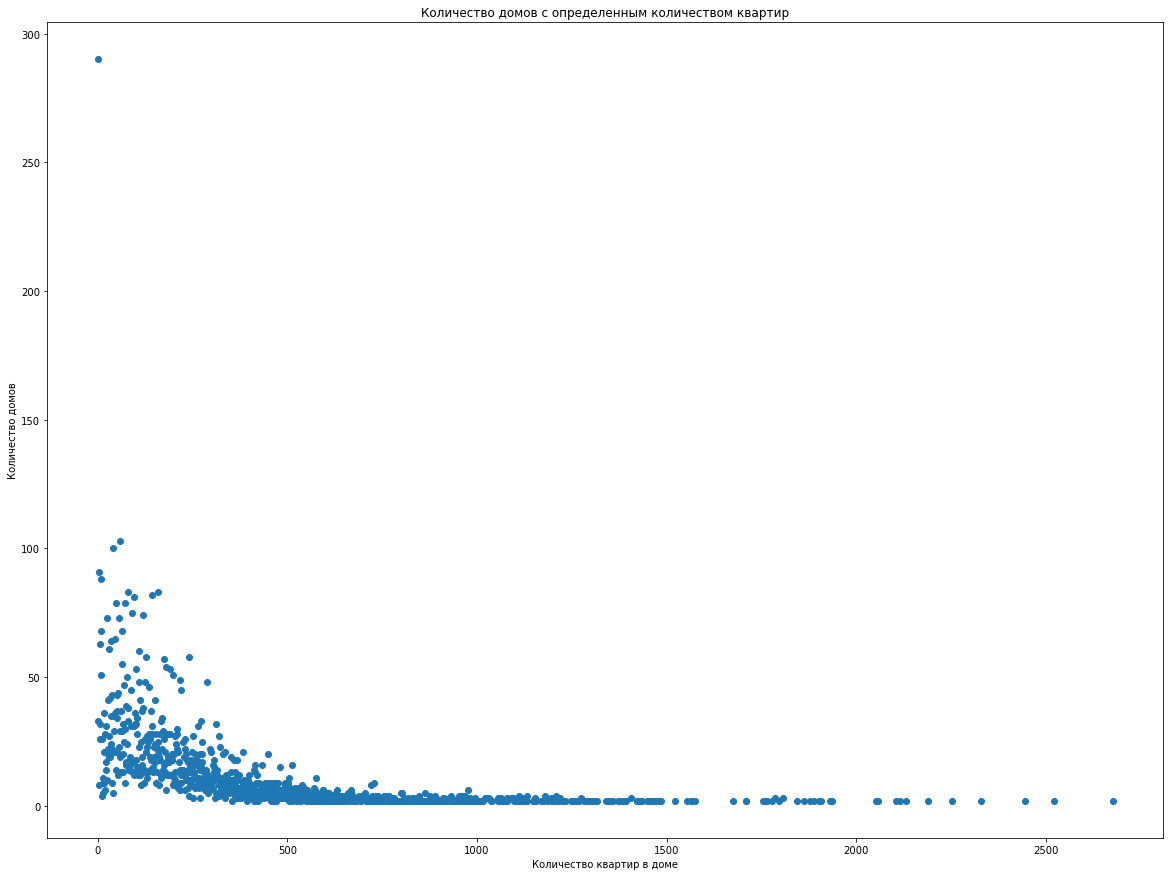

In [20]:
plt.scatter(df_flat['flat'],df_flat['count'])
plt.title('Количество домов с определенным количеством квартир')
plt.xlabel('Количество квартир в доме')
plt.ylabel('Количество домов', rotation=90)
plt.show()

### По графику видно, что на сайте очень много домов в которых всего одна квартира, меньше же всего домов, в которых 2676 квартир. Чаще всего встречаются дома, в которых до 400 квартир.

## Жилая площадь по регионам

In [21]:
SumSquare = {}
for reg in region:
    row = dict({'name' : reg['name'], 'sum' : 0, 'count' : 0})
    SumSquare[reg['id']] = row

for obj in df.iterrows():
    if not pd.isna(obj[1]['objSquareLiving']):
        row = SumSquare[obj[1]['region']]
        row['sum'] += obj[1]['objSquareLiving']
        row['count'] += 1
df_square = pd.DataFrame(SumSquare).T
df_square = df_square.sort_values('sum')
df_square 

,name,sum,count
51,Мурманская область,0,0
87,Чукотский АО,0,0
6,Республика Ингушетия,0,0
41,Камчатский край,0,0
83,Ненецкий АО,0,0
...,...,...,...
66,Свердловская область,3756856.47,336
23,Краснодарский край,8247047.37,951
78,Город Санкт-Петербург,8707194.19,660
50,Московская область,8987622.56,774


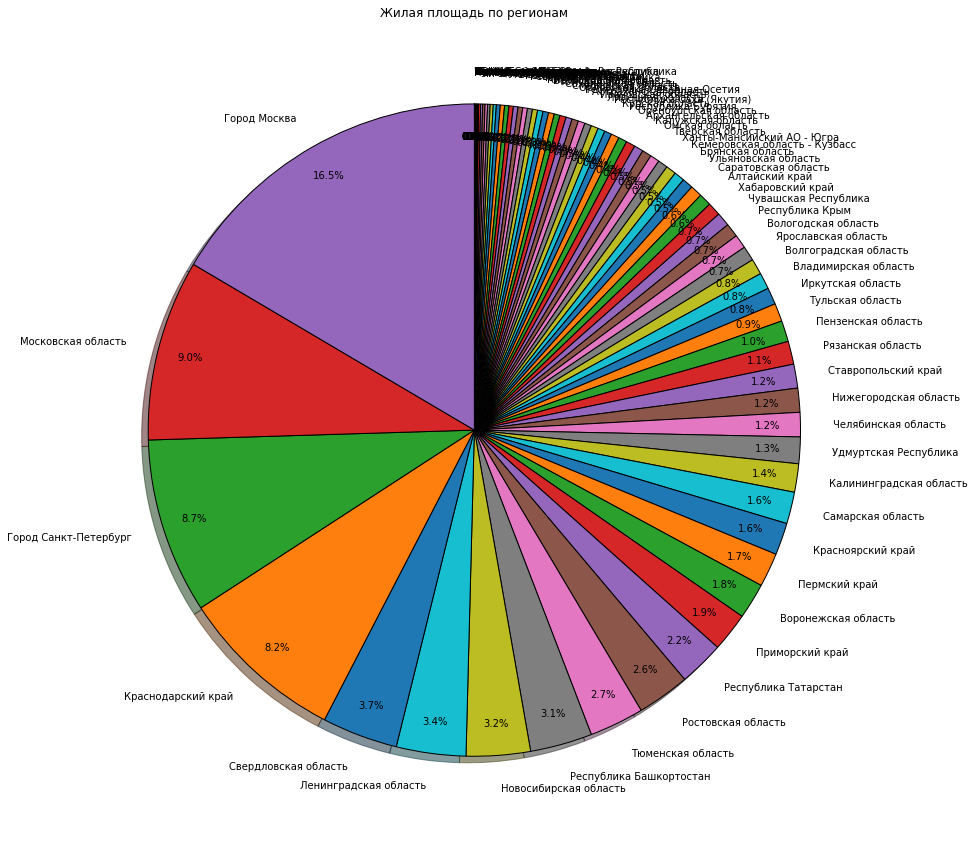

In [22]:
wedge_properties = {"edgecolor":"k",'linewidth': 1}
plt.pie(df_square['sum'], labels=df_square['name'], startangle=90,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct="%1.1f%%", pctdistance=0.9)
plt.title("Жилая площадь по регионам")
plt.show()

### Хоть и в конце круговой диаграммы плохо различимы данные, но все равно можно легко понятно какие регионы вносят самый большой вклад в жилой фонд России. Больше всего жилой площади в Москве и Московской области.

## Количество парковочных мест и цена за квадратный метр
### В процессе отбора данных, мы намерено не будут учитывать строящиеся дома, у которых отсутствуют парковочные места, либо отсутствует средняя цена за квадратный метр. Это сделано для того, чтобы не загрязнять график, благодаря этому можно будет лучше попытаться выявить закономерность между парковочными местами и ценой.

In [23]:
statisticsParkingPrice = {}
for obj in df.iterrows():
    parkPrice = str(obj[1]['objElemParkingCnt']) + " " + str(obj[1]['objPriceAvg'])
    count = statisticsParkingPrice[parkPrice] if parkPrice in statisticsParkingPrice.keys() else 1
    statisticsParkingPrice[parkPrice] = count+1

df_parkingPrice = pd.DataFrame(columns = ['parking', 'price', 'count'])
for item in statisticsParkingPrice.items():
    parking, price = item[0].split()
    parking, price = float(parking), float(price)
    if not pd.isna(parking) and not pd.isna(price) and parking != 0 and price != 0:
        row = pd.DataFrame([{'parking' : parking, 'price' : price, 'count' : item[1]}])
        df_parkingPrice = pd.concat([df_parkingPrice, row], ignore_index=True)
    
df_parkingPrice = df_parkingPrice.sort_values('parking')
df_parkingPrice

,parking,price,count
1507,1.0,143205.0,2
62,1.0,85792.0,2
1118,3.0,160381.0,2
1381,3.0,147932.0,2
202,4.0,43241.0,2
...,...,...,...
925,1175.0,37858.0,2
193,1315.0,432926.0,2
1340,1475.0,639776.0,2
1663,1901.0,17691.0,2


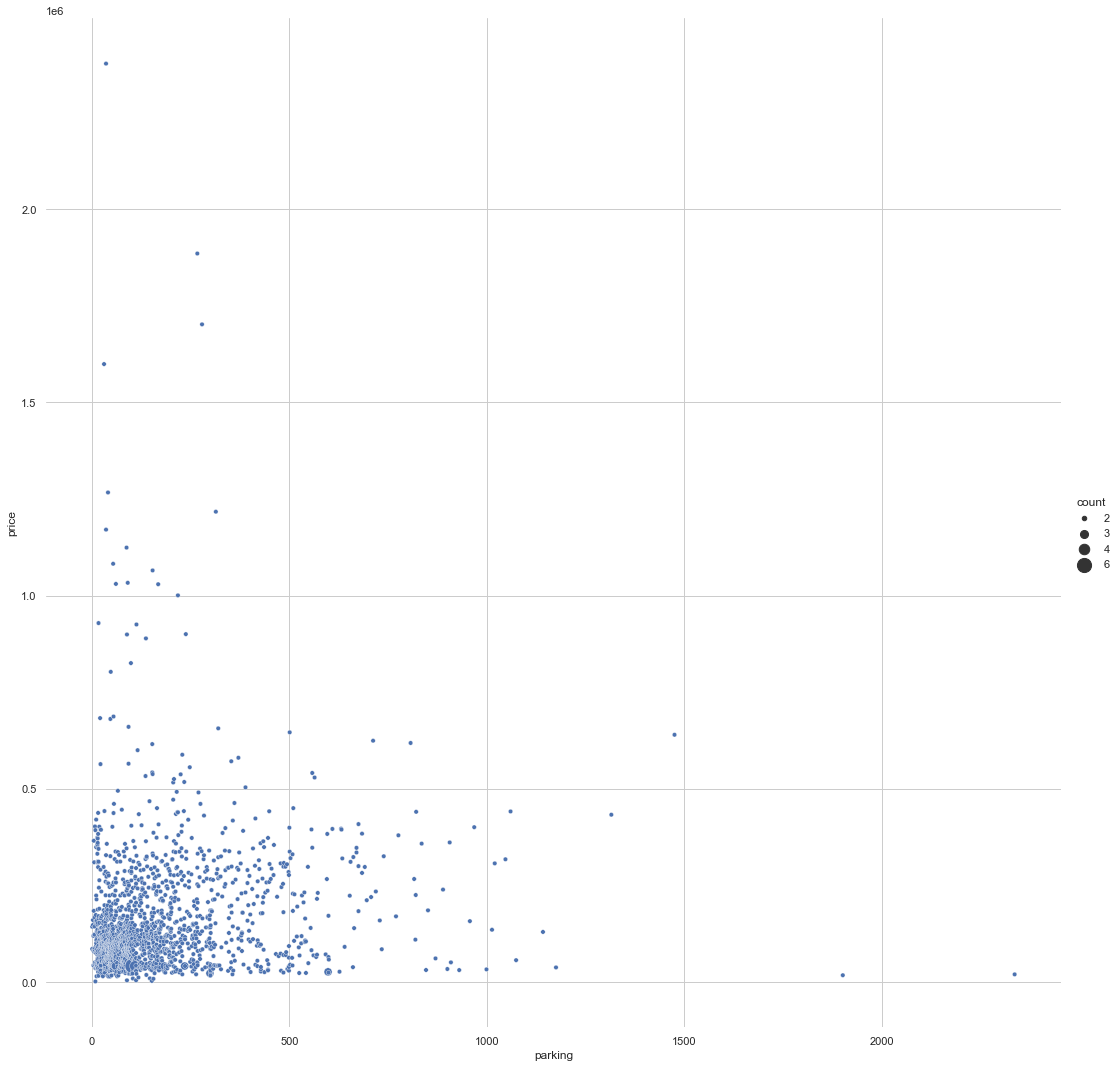

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_parkingPrice,
    x="parking", y="price", size="count",
    palette=cmap, sizes=(20, 200), height=15,
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

### Не очень хорошо видно, поэтому приблизим.

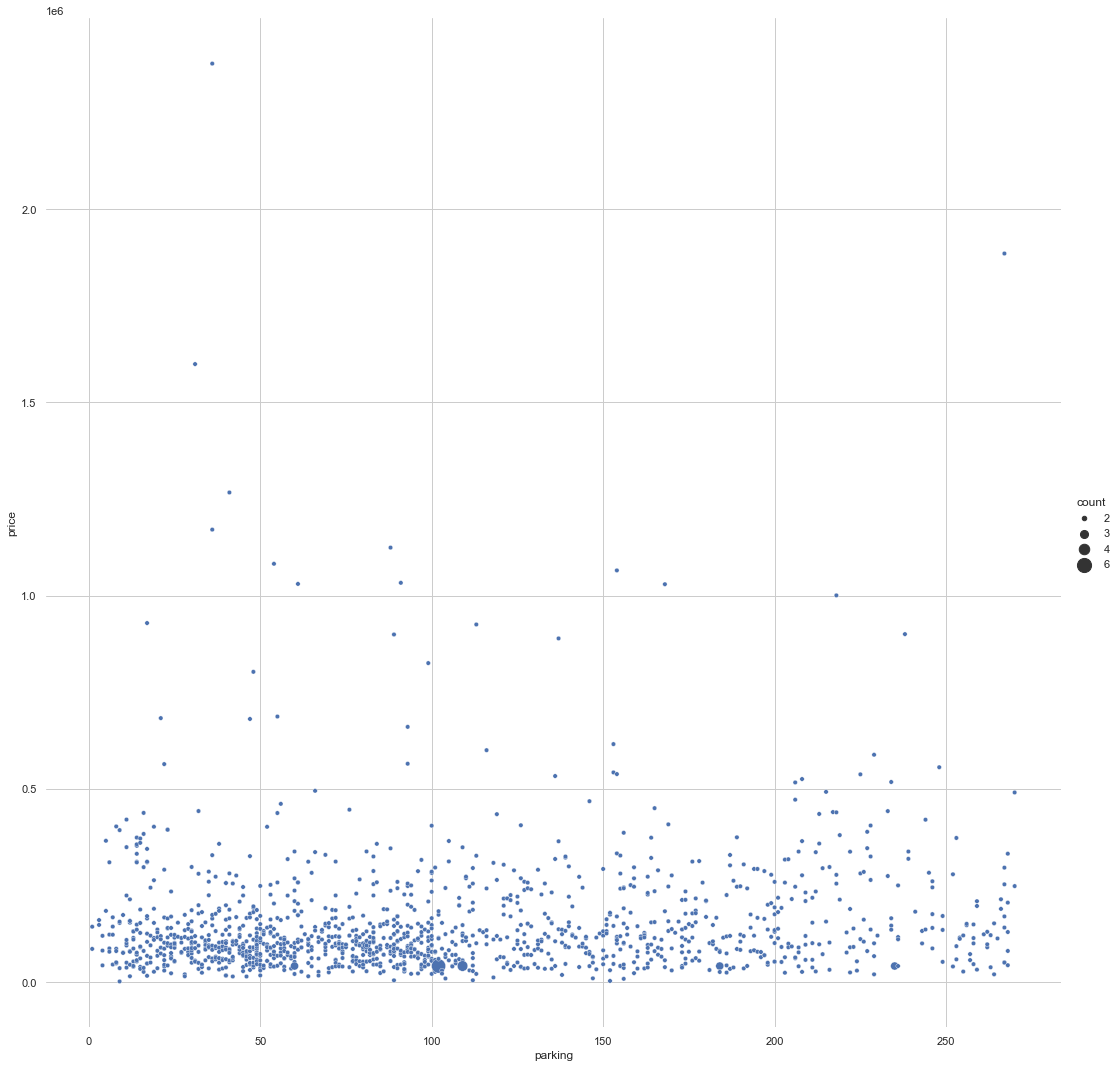

In [25]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_parkingPrice[:1400],
    x="parking", y="price", size="count",
    palette=cmap, sizes=(20, 200), height=15,
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

### В итоге мы получили график распределения домов от их средней цены за квадратный метр и количества парковочных мест. Исходя из него можно сказать, что если в доме средняя цена за квадратный метр около 180 тыс. рублей, то скорее всего у него будет от 20 до 120 парковочных мест. Такое большое скопление домов в данном промежутке объясняется тем, что это среднестатистические новостройки, которых строится очень много. <br> Отчетливо видно, что при высокой цене дом имеет маленькое количество парковочных мест, это можно объяснить тем, что в таких домах либо, мало квартир(элитные новостройки), либо это частые дома(коттеджи), соответственно в таком случае не нужно много парковочных мест.    